In [41]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\Mapped_all_ingredients_enhanced-context-corrected_final.xlsx"
df = pd.read_excel(path)

print("Shape:", df.shape)
df.head()

Shape: (3701, 24)


,original_text,Chile Lime Seasoning,name_confidence,amount,amount_text,unit,amount_confidence,preparation,preparation_confidence,recipe_title,...,likely_sub_category_2,likely_sub_category_2_score,main_category_2,likely_sub_category_3,likely_sub_category_3_score,main_category_3,matched_products,units,matched_categories,match_scores
0,4 tablespoons TJ’s Salted Butter,Salted Butter,0.933367,4.0,4 tablespoons,tablespoon,0.999948,NaN,NaN,Aromatic Garlic Ginger Rice,...,Butter,0.148203,Dairy & Eggs,Cool Desserts,0.145936,From The Freezer,"Butter Quarters, Salted; Cultured Salted Butte...",16 Oz; 8.8 Oz; 4 Oz,Dairy & Eggs; Dairy & Eggs; Dairy & Eggs,0.770; 0.730; 0.726
1,2 tablespoons finely chopped TJ’s Fresh Garlic,Fresh Garlic,0.942706,2.0,2 tablespoons,tablespoon,0.999844,finely chopped,0.961860,Aromatic Garlic Ginger Rice,...,"Beef, Pork & Lamb",0.045175,"Meat, Seafood & Plant-based",Spices,0.037934,For the Pantry,Garlic & Jalapeño Stuffed Olives,17.64 Oz,For the Pantry,0.735
2,1 tablespoon finely chopped TJ’s Fresh Ginger,Fresh Ginger,0.992840,1.0,1 tablespoon,tablespoon,0.999925,finely chopped,0.997657,Aromatic Garlic Ginger Rice,...,Spices,0.021007,For the Pantry,Fruits,0.010147,Fresh Fruits & Veggies,Miso Ginger Broth,32 Fl Oz,For the Pantry,0.724
3,"1 cup TJ’s Jasmine Rice, rinsed",Jasmine Rice,0.997608,1.0,1 cup,cup,0.999978,rinsed,0.998351,Aromatic Garlic Ginger Rice,...,Cereals,0.111725,For the Pantry,Spices,0.051027,For the Pantry,Jasmine Rice From Thailand,3 Lb,For the Pantry,0.951
4,2 cups hot water,hot water,0.995191,2.0,2 cups,cup,0.999965,NaN,NaN,Aromatic Garlic Ginger Rice,...,Salsa & Hot Sauce,0.109329,"Dips, Sauces & Dressings",For Baking & Cooking,0.107880,For the Pantry,NaN,NaN,NaN,NaN


In [43]:
num_recipes = df['recipe_title'].nunique()
print(f"Total unique recipes: {num_recipes}")

Total unique recipes: 555


In [4]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()
num_recipes_clean = df['recipe_title_clean'].nunique()
print(f"Total unique recipes (cleaned): {num_recipes_clean}")

Total unique recipes (cleaned): 555


count    555.000000
mean       6.668468
std        2.646092
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: original_text, dtype: float64


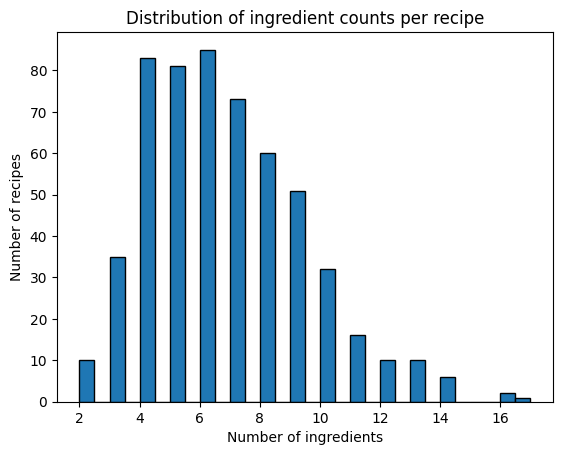

original_text
2     10
3     35
4     83
5     81
6     85
7     73
8     60
9     51
10    32
11    16
12    10
13    10
14     6
16     2
17     1
Name: count, dtype: int64


In [5]:
ingredients_per_recipe = df.groupby('recipe_title')['original_text'].count()
print(ingredients_per_recipe.describe())

ingredients_per_recipe.plot.hist(bins=30, edgecolor='black')
plt.title("Distribution of ingredient counts per recipe")
plt.xlabel("Number of ingredients")
plt.ylabel("Number of recipes")
plt.show()

ingredient_counts = ingredients_per_recipe.value_counts().sort_index()
print(ingredient_counts)

Full dataset:
count    555.000000
mean       6.668468
std        2.646092
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: original_text, dtype: float64

After filtering blank matched_products:
count    549.000000
mean       5.129326
std        2.509768
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       16.000000
Name: original_text, dtype: float64

Top 10 most common ingredients (to be excluded):
['Sea Salt', 'Unsalted Butter', 'Olive Oil', 'Garlic', 'Lemon', 'Eggs', 'Organic Cane Sugar', 'Salted Butter', 'Organic Pure Bourbon Vanilla Extract', 'Whole Milk']


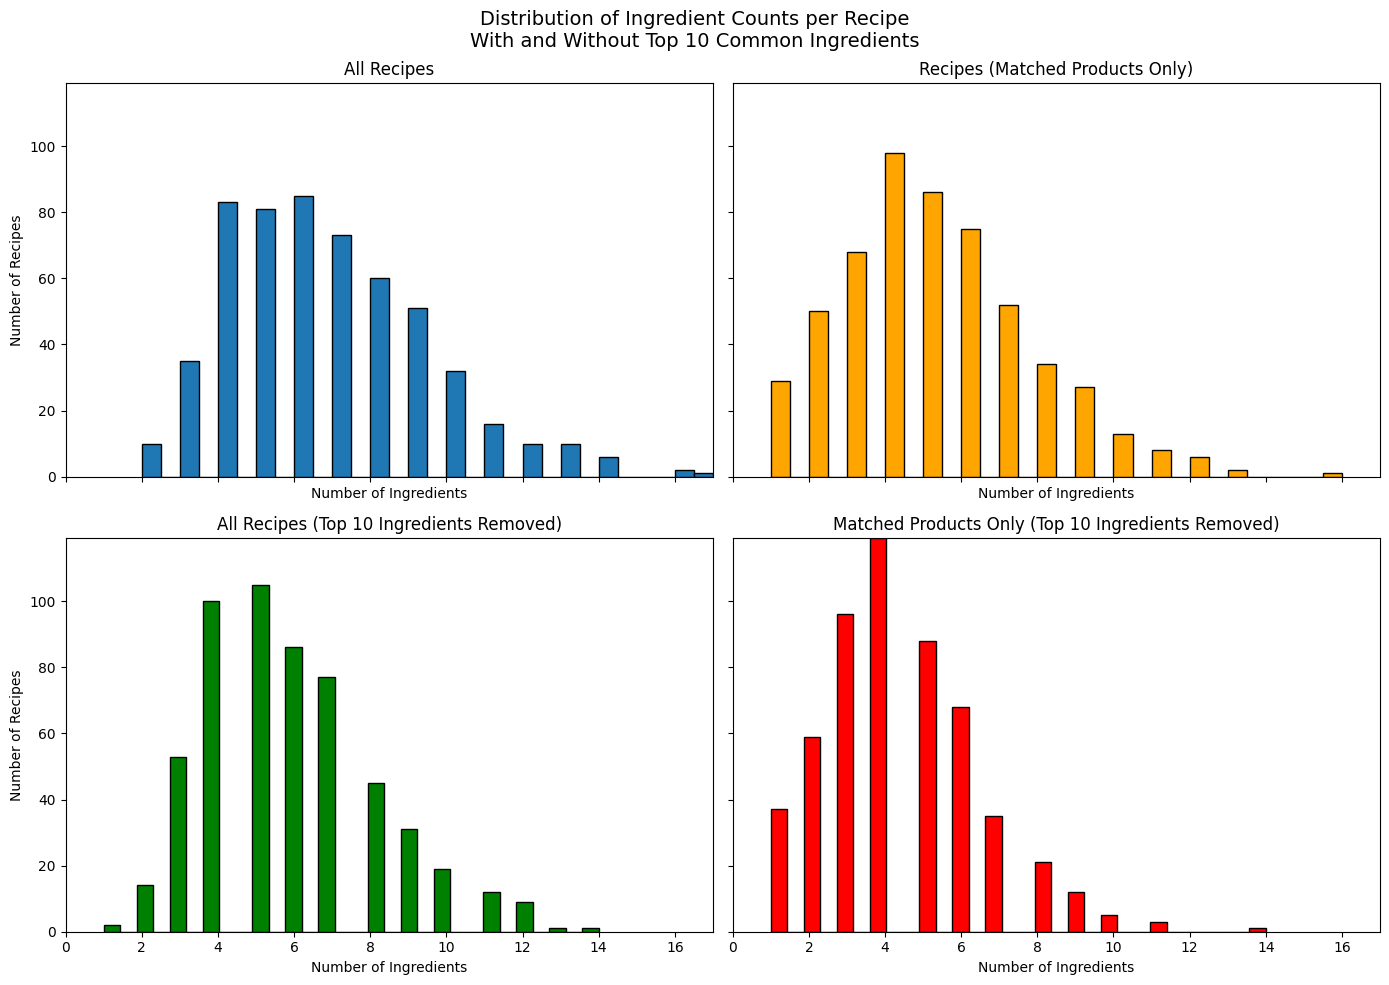

In [33]:
# --- Base ingredient counts ---
ingredients_per_recipe = df.groupby('recipe_title')['original_text'].count()

# --- Filtered dataset (only rows with matched_products) ---
df_filtered = df[~df['matched_products'].isna() & (df['matched_products'].astype(str).str.strip() != '')]
ingredients_per_recipe_filtered = df_filtered.groupby('recipe_title')['original_text'].count()

print("Full dataset:")
print(ingredients_per_recipe.describe())
print("\nAfter filtering blank matched_products:")
print(ingredients_per_recipe_filtered.describe())

top_ingredients = (
    df['name']
    .value_counts()
    .head(10)
    .index
)
print("\nTop 10 most common ingredients (to be excluded):")
print(top_ingredients.tolist())


df_no_top = df[~df['name'].isin(top_ingredients)]
df_filtered_no_top = df_filtered[~df_filtered['name'].isin(top_ingredients)]

ingredients_per_recipe_no_top = df_no_top.groupby('recipe_title')['original_text'].count()
ingredients_per_recipe_filtered_no_top = df_filtered_no_top.groupby('recipe_title')['original_text'].count()

x_max = max(
    ingredients_per_recipe.max(),
    ingredients_per_recipe_filtered.max(),
    ingredients_per_recipe_no_top.max(),
    ingredients_per_recipe_filtered_no_top.max()
)

y_max = max(
    ingredients_per_recipe.value_counts().max(),
    ingredients_per_recipe_filtered.value_counts().max(),
    ingredients_per_recipe_no_top.value_counts().max(),
    ingredients_per_recipe_filtered_no_top.value_counts().max()
)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

axes[0, 0].hist(ingredients_per_recipe, bins=30, edgecolor='black')
axes[0, 0].set_title("All Recipes")
axes[0, 0].set_xlabel("Number of Ingredients")
axes[0, 0].set_ylabel("Number of Recipes")

axes[0, 1].hist(ingredients_per_recipe_filtered, bins=30, edgecolor='black', color='orange')
axes[0, 1].set_title("Recipes (Matched Products Only)")
axes[0, 1].set_xlabel("Number of Ingredients")

axes[1, 0].hist(ingredients_per_recipe_no_top, bins=30, edgecolor='black', color='green')
axes[1, 0].set_title("All Recipes (Top 10 Ingredients Removed)")
axes[1, 0].set_xlabel("Number of Ingredients")
axes[1, 0].set_ylabel("Number of Recipes")

axes[1, 1].hist(ingredients_per_recipe_filtered_no_top, bins=30, edgecolor='black', color='red')
axes[1, 1].set_title("Matched Products Only (Top 10 Ingredients Removed)")
axes[1, 1].set_xlabel("Number of Ingredients")

for ax in axes.flat:
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)

plt.suptitle("Distribution of Ingredient Counts per Recipe\nWith and Without Top 10 Common Ingredients", fontsize=14)
plt.tight_layout()

In [6]:
dup_within_recipe = df.groupby('recipe_title')['name'].apply(
    lambda x: x.duplicated().sum()
)
print(f"Average duplicate ingredients per recipe: {dup_within_recipe.mean():.2f}")

Average duplicate ingredients per recipe: 0.01


In [7]:
ingredient_overlap = df['name'].nunique()
print(f"Unique ingredient names overall: {ingredient_overlap}")
total_ingredients = len(df)
print(f"Total ingredient entries: {total_ingredients}")
print(f"Ingredients reused across recipes: {total_ingredients - ingredient_overlap}")

Unique ingredient names overall: 1786
Total ingredient entries: 3701
Ingredients reused across recipes: 1915


In [8]:
df_filtered = df[~df['matched_products'].isna() & (df['matched_products'].astype(str).str.strip() != '')]
print(f"Remaining rows after filtering: {len(df_filtered)} ({len(df_filtered)/len(df)*100:.1f}% of original)")


Remaining rows after filtering: 2816 (76.1% of original)


In [9]:
num_recipes_filtered = df_filtered['recipe_title'].nunique()
print(f"Unique recipes after filtering: {num_recipes_filtered}")


Unique recipes after filtering: 549


In [10]:
ingredients_per_recipe_filtered = df_filtered.groupby('recipe_title')['original_text'].count()
print(ingredients_per_recipe_filtered.describe())

count    549.000000
mean       5.129326
std        2.509768
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       16.000000
Name: original_text, dtype: float64


In [11]:
merged = (
    pd.DataFrame({
        'before': ingredients_per_recipe,
        'after': ingredients_per_recipe_filtered
    })
    .fillna(0)
)
merged['lost'] = merged['before'] - merged['after']

print("Average ingredients lost per recipe:", merged['lost'].mean())
print("Recipes that lost all ingredients:", (merged['after'] == 0).sum())


Average ingredients lost per recipe: 1.5945945945945945
Recipes that lost all ingredients: 6


In [12]:
dup_within_recipe_filtered = df_filtered.groupby('recipe_title')['name'].apply(
    lambda x: x.duplicated().sum()
)
print(f"Average duplicate ingredients per recipe (after filter): {dup_within_recipe_filtered.mean():.2f}")


Average duplicate ingredients per recipe (after filter): 0.01


In [13]:
ingredient_overlap_filtered = df_filtered['name'].nunique()
total_ingredients_filtered = len(df_filtered)
print(f"Unique ingredient names overall (after filter): {ingredient_overlap_filtered}")
print(f"Total ingredient entries (after filter): {total_ingredients_filtered}")
print(f"Ingredients reused across recipes (after filter): {total_ingredients_filtered - ingredient_overlap_filtered}")


Unique ingredient names overall (after filter): 1186
Total ingredient entries (after filter): 2816
Ingredients reused across recipes (after filter): 1630


Example of most common ingredients:
name
Sea Salt                                135
Unsalted Butter                          57
Olive Oil                                40
Garlic                                   36
Lemon                                    33
Organic Cane Sugar                       30
Eggs                                     30
Salted Butter                            26
Organic Pure Bourbon Vanilla Extract     23
Yellow Onion                             23
Whole Milk                               23
Ground Black Pepper                      22
your favorite Extra Virgin Olive Oil     21
Large Eggs                               21
Red Onion                                20
your favorite Olive Oil                  20
water                                    19
Canola Oil Spray                         19
Lime                                     18
Egg                                      17
Name: recipe_title_clean, dtype: int64

Distribution (number of recipes → count

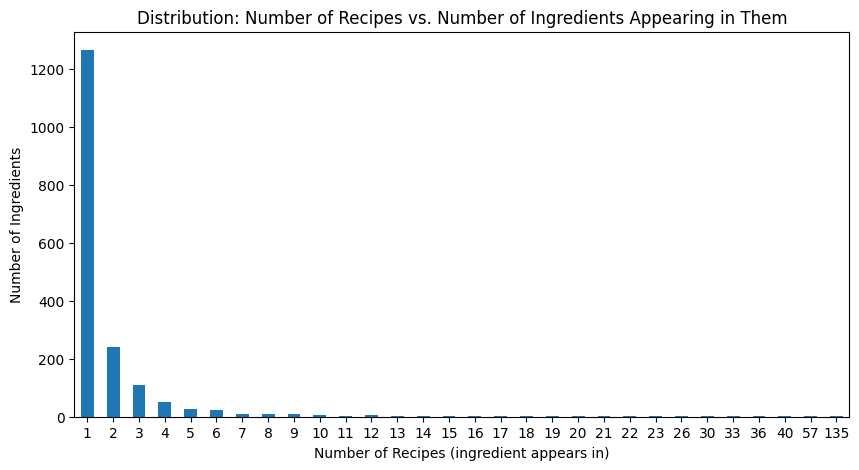

In [15]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

ingredient_recipe_counts = (
    df.groupby('name')['recipe_title_clean']
      .nunique()
      .sort_values(ascending=False)
)

print("Example of most common ingredients:")
print(ingredient_recipe_counts.head(20))

ingredient_popularity_dist = ingredient_recipe_counts.value_counts().sort_index()

print("\nDistribution (number of recipes → count of ingredients):")
print(ingredient_popularity_dist)

plt.figure(figsize=(10,5))
ingredient_popularity_dist.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. Number of Ingredients Appearing in Them")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Ingredients")
plt.xticks(rotation=0)
plt.show()


Excluded top 20 ingredients:
['Sea Salt', 'Unsalted Butter', 'Olive Oil', 'Garlic', 'Lemon', 'Organic Cane Sugar', 'Eggs', 'Salted Butter', 'Organic Pure Bourbon Vanilla Extract', 'Yellow Onion', 'Whole Milk', 'Ground Black Pepper', 'your favorite Extra Virgin Olive Oil', 'Large Eggs', 'Red Onion', 'your favorite Olive Oil', 'water', 'Canola Oil Spray', 'Lime', 'Egg']

Top 10 most common ingredients (AFTER filtering top 20):
name
Cilantro                                 17
Extra Virgin Olive Oil                   16
Salt                                     15
Milk                                     14
Ground Cinnamon                          14
Canola Oil                               14
Parsley                                  13
Heavy Cream                              13
Unbleached Enriched All-Purpose Flour    13
Avocado                                  12
Name: recipe_title_clean, dtype: int64

Distribution (number of recipes → count of ingredients, after filtering top 20):
recip

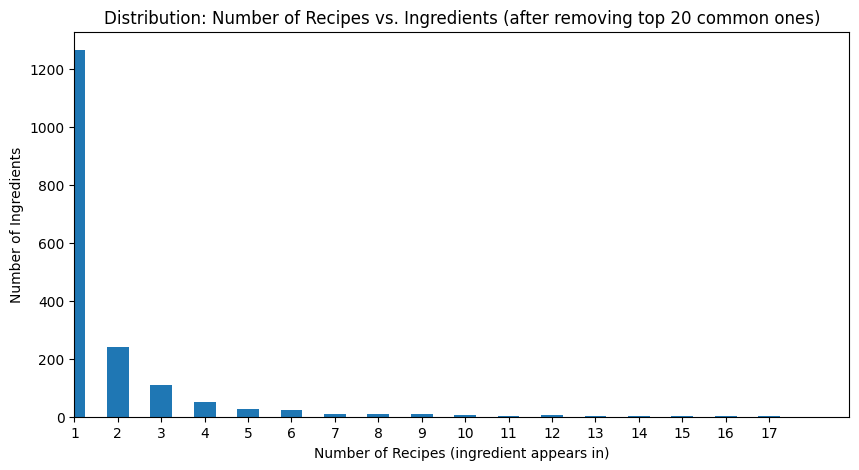

In [21]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

ingredient_recipe_counts = (
    df.groupby('name')['recipe_title_clean']
      .nunique()
      .sort_values(ascending=False)
)

excluded_ingredients = ingredient_recipe_counts.head(20).index
ingredient_recipe_counts_filtered = ingredient_recipe_counts.drop(excluded_ingredients)

print(f"Excluded top {len(excluded_ingredients)} ingredients:")
print(list(excluded_ingredients))

print("\nTop 10 most common ingredients (AFTER filtering top 20):")
print(ingredient_recipe_counts_filtered.head(10))

ingredient_popularity_dist_filtered = (
    ingredient_recipe_counts_filtered.value_counts()
    .sort_index()
)

print("\nDistribution (number of recipes → count of ingredients, after filtering top 20):")
print(ingredient_popularity_dist_filtered)

plt.figure(figsize=(10,5))
ingredient_popularity_dist_filtered.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. Ingredients (after removing top 20 common ones)")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Ingredients")
plt.xticks(rotation=0)

plt.xlim(0, ingredient_popularity_dist_filtered.index.max() * 1.05)
plt.show()


Total rows without matched products: 885 (23.9% of dataset)

Example of most common UNMATCHED ingredients:
name
Limes                                                       12
Large Egg                                                   10
Mirepoix                                                    10
Baking Powder                                                9
Japanese Style Panko Breadcrumbs                             9
Glaze                                                        8
Sour Cream                                                   8
Garlic Powder                                                7
Chives                                                       6
Hot & Sweet Jalapeños                                        6
Iceberg Lettuce                                              6
Corn Tortillas                                               6
Organic Shredded Green & Red Cabbage with Orange Carrots     6
juice from a Lemon                                           6
Zucchi

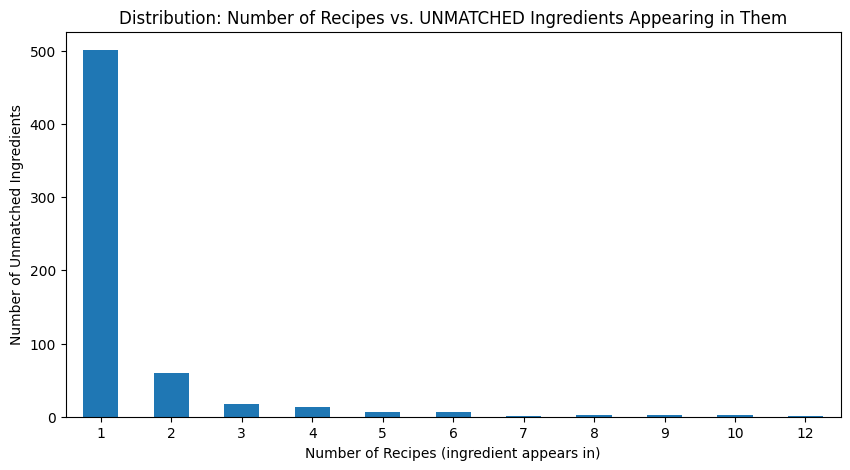

In [22]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

df_no_match = df[df['matched_products'].isna() | (df['matched_products'].astype(str).str.strip() == '')]

print(f"Total rows without matched products: {len(df_no_match)} ({len(df_no_match)/len(df)*100:.1f}% of dataset)")

ingredient_recipe_counts_no_match = (
    df_no_match.groupby('name')['recipe_title_clean']
        .nunique()
        .sort_values(ascending=False)
)

print("\nExample of most common UNMATCHED ingredients:")
print(ingredient_recipe_counts_no_match.head(20))

ingredient_popularity_dist_no_match = (
    ingredient_recipe_counts_no_match.value_counts()
        .sort_index()
)

print("\nDistribution (number of recipes → count of UNMATCHED ingredients):")
print(ingredient_popularity_dist_no_match)
-
plt.figure(figsize=(10,5))
ingredient_popularity_dist_no_match.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. UNMATCHED Ingredients Appearing in Them")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Unmatched Ingredients")
plt.xticks(rotation=0)
plt.show()


Ingredients file: (3701, 24)
Catalog file: (1302, 8)
                 category sub_category       product_name
0  Fresh Fruits & Veggies       Fruits  Sugar Sweet Melon
1  Fresh Fruits & Veggies       Fruits     Saturn Peaches
2  Fresh Fruits & Veggies       Fruits    Fruitful Medley
3  Fresh Fruits & Veggies       Fruits    Seedless Lemons
4  Fresh Fruits & Veggies       Fruits       Hass Avocado
Matched rows with at least one product: 3701
Rows successfully matched to catalog: 993

Example merged rows:
                                       matched_first  \
0                   Garlic & Jalapeño Stuffed Olives   
1                                  Miso Ginger Broth   
2                         Jasmine Rice From Thailand   
3                          Chicken Broth Concentrate   
4  TJ's Mushroom & Company Multipurpose Umami Sea...   

                                        product_name  \
0                   Garlic & Jalapeño Stuffed Olives   
1                                  Miso G

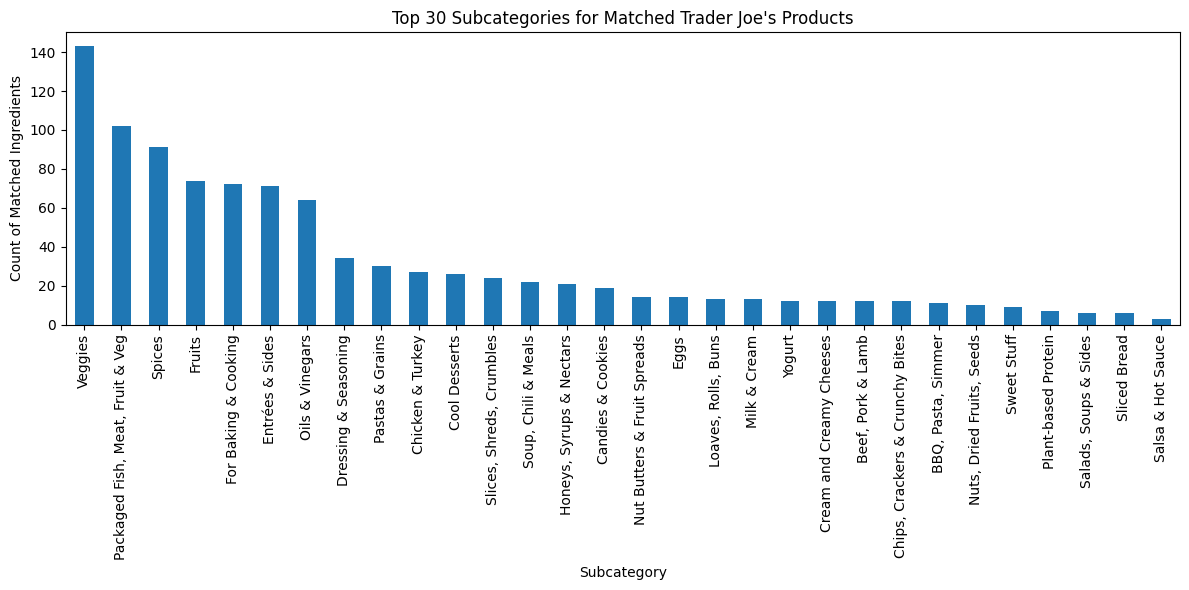

In [25]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

path_ingredients = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\mapped_all_ingredients_mini_with_sub-context_brett_top_5_matches_with_enhanced-context_v3.csv"
path_catalog = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\trader_joes_products_v3_with_shelf_life.csv"

df = pd.read_csv(path_ingredients)
catalog = pd.read_csv(path_catalog)

print(f"Ingredients file: {df.shape}")
print(f"Catalog file: {catalog.shape}")
print(catalog[['category', 'sub_category', 'product_name']].head())

df['matched_first'] = (
    df['matched_products']
    .astype(str)
    .str.split(',')
    .str[0]
    .str.strip()
)

df_matched = df[df['matched_first'].notna() & (df['matched_first'] != '')]

print(f"Matched rows with at least one product: {len(df_matched)}")

merged = pd.merge(
    df_matched,
    catalog,
    left_on='matched_first',
    right_on='product_name',
    how='inner'
)

print(f"Rows successfully matched to catalog: {len(merged)}")
print("\nExample merged rows:")
print(merged[['matched_first', 'product_name', 'sub_category', 'category']].head())

subcat_counts = (
    merged['sub_category']
    .value_counts()
    .sort_values(ascending=False)
)

print("\nTop subcategories:")
print(subcat_counts.head(20))

plt.figure(figsize=(12,6))
subcat_counts.head(30).plot(kind='bar')
plt.title("Top 30 Subcategories for Matched Trader Joe's Products")
plt.xlabel("Subcategory")
plt.ylabel("Count of Matched Ingredients")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Average number of recipes each subcategory's ingredients appear in:
sub_category
Entrées & Sides                     7.777778
Eggs                                7.000000
Milk & Cream                        6.500000
Oils & Vinegars                     6.400000
Yogurt                              5.500000
Spices                              5.352941
Honeys, Syrups & Nectars            5.250000
Packaged Fish, Meat, Fruit & Veg    5.050000
For Baking & Cooking                5.000000
Fruits                              4.352941
Loaves, Rolls, Buns                 4.333333
Veggies                             4.032258
Dressing & Seasoning                3.777778
Plant-based Protein                 3.500000
Slices, Shreds, Crumbles            3.428571
Soup, Chili & Meals                 3.142857
Pastas & Grains                     3.000000
Cool Desserts                       2.777778
Chicken & Turkey                    2.454545
Cream and Creamy Cheeses            2.400000
Name: recipe_count

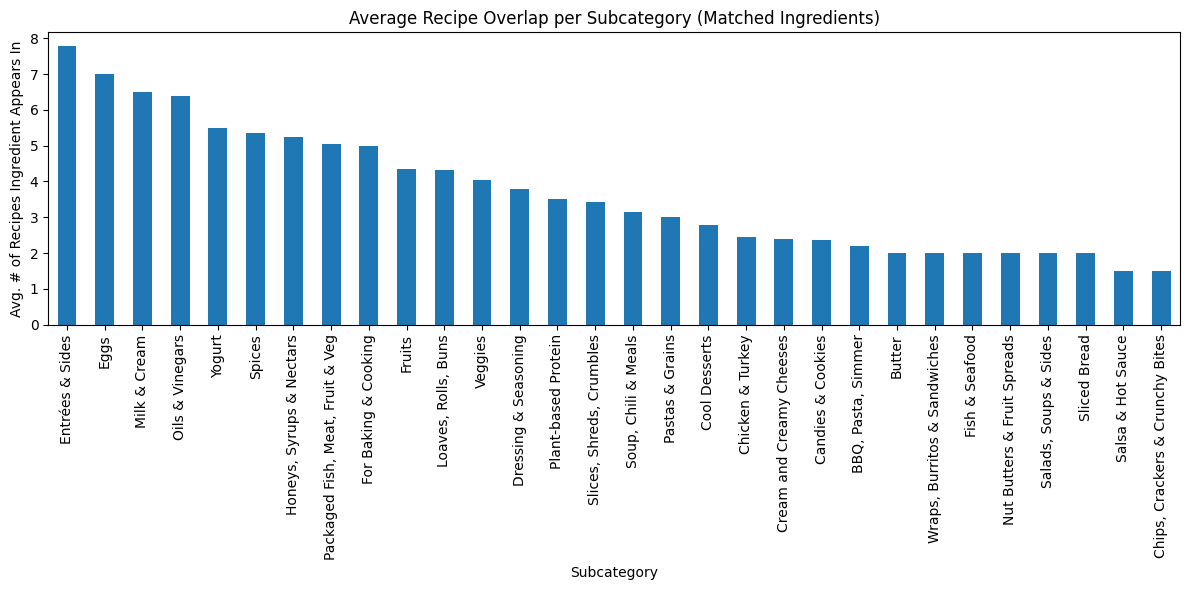

In [26]:
merged['recipe_title_clean'] = merged['recipe_title'].str.strip().str.lower()

ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

merged_overlap = pd.merge(
    ingredient_overlap,
    merged[['matched_first', 'sub_category', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

subcategory_overlap = (
    merged_overlap.groupby('sub_category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each subcategory's ingredients appear in:")
print(subcategory_overlap.head(20))

plt.figure(figsize=(12,6))
subcategory_overlap.head(30).plot(kind='bar')
plt.title("Average Recipe Overlap per Subcategory (Matched Ingredients)")
plt.xlabel("Subcategory")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Average number of recipes each CATEGORY's ingredients appear in:
category
Dairy & Eggs                   5.714286
From The Freezer               4.850000
For the Pantry                 4.521739
Fresh Fruits & Veggies         4.145833
Dips, Sauces & Dressings       2.684211
Cheese                         2.600000
Meat, Seafood & Plant-based    2.086957
Bakery                         2.071429
Fresh Prepared Foods           1.800000
Snacks & Sweets                1.782609
Name: recipe_count, dtype: float64


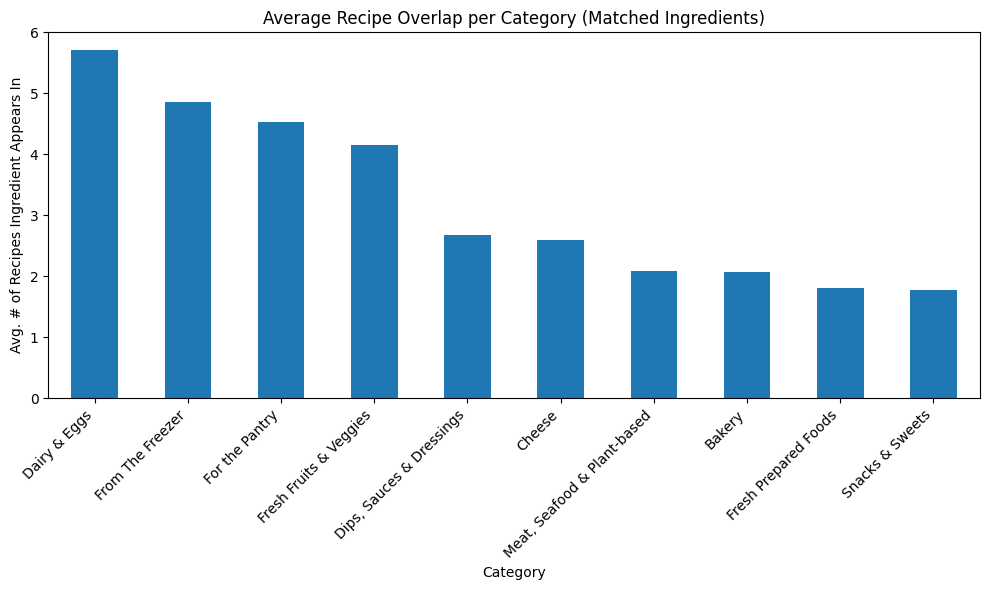

In [27]:
ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

merged_overlap = pd.merge(
    ingredient_overlap,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

category_overlap = (
    merged_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's ingredients appear in:")
print(category_overlap)

plt.figure(figsize=(10,6))
category_overlap.plot(kind='bar')
plt.title("Average Recipe Overlap per Category (Matched Ingredients)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
category_counts = merged_overlap['category'].value_counts()

category_summary = pd.DataFrame({
    'avg_recipe_overlap': category_overlap,
    'ingredient_count': category_counts
}).sort_values('avg_recipe_overlap', ascending=False)

print(category_summary.head(10))

                             avg_recipe_overlap  ingredient_count
category                                                         
Dairy & Eggs                           5.714286                 7
From The Freezer                       4.850000                20
For the Pantry                         4.521739                92
Fresh Fruits & Veggies                 4.145833                48
Dips, Sauces & Dressings               2.684211                19
Cheese                                 2.600000                15
Meat, Seafood & Plant-based            2.086957                23
Bakery                                 2.071429                14
Fresh Prepared Foods                   1.800000                 5
Snacks & Sweets                        1.782609                23


Top 10 overlapping ingredients (removed):
                                         matched_first  recipe_count
36                       Chicken Cilantro Mini Wontons            54
138                           Organic Canola Oil Spray            36
87              Greek Chickpeas with Cumin and Parsley            30
151                        Organic Ground Black Pepper            29
84                          Gourmet Fried Onion Pieces            24
146  Organic Diced & Fire Roasted Tomatoes with Gre...            21
91                                        Green Onions            19
140             Organic Coconut Aminos Seasoning Sauce            16
96                                        Hass Avocado            15
77                    Garlic & Jalapeño Stuffed Olives            14

Average number of recipes each CATEGORY's ingredients appear in (after filtering top 10):
category
Dairy & Eggs                   5.714286
Fresh Fruits & Veggies         3.586957
For the Pantry     

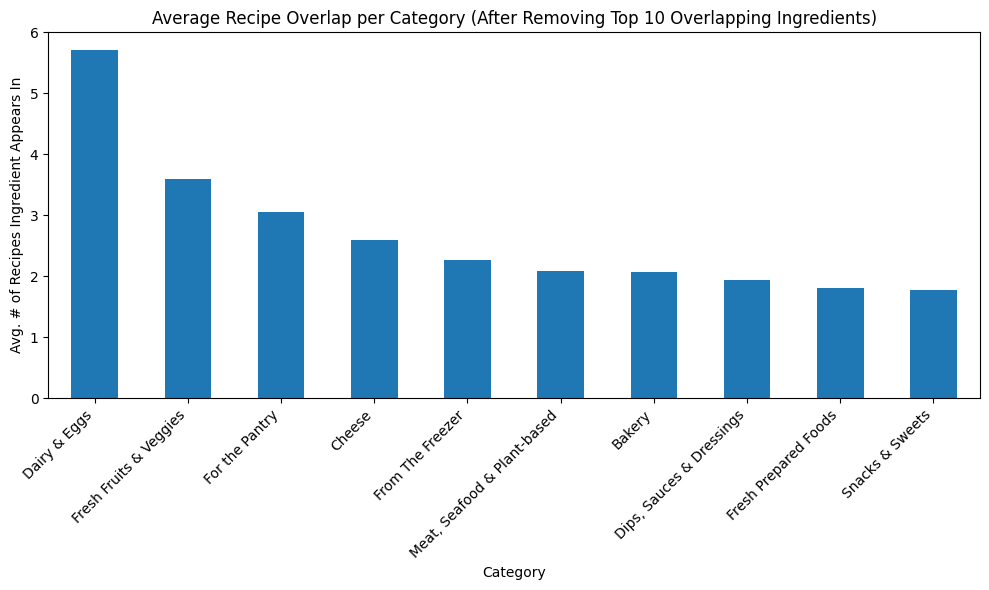

In [29]:
ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

top_overlap = ingredient_overlap.nlargest(10, 'recipe_count')
print("Top 10 overlapping ingredients (removed):")
print(top_overlap)

ingredient_overlap_filtered = ingredient_overlap[~ingredient_overlap['matched_first'].isin(top_overlap['matched_first'])]

merged_overlap = pd.merge(
    ingredient_overlap_filtered,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

category_overlap_filtered = (
    merged_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's ingredients appear in (after filtering top 10):")
print(category_overlap_filtered)

plt.figure(figsize=(10,6))
category_overlap_filtered.plot(kind='bar')
plt.title("Average Recipe Overlap per Category (After Removing Top 10 Overlapping Ingredients)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Shape: (2577, 7)
Columns: ['ingredient_id', 'ingredient_name', 'norm_name', 'matched_product', 'match_score', 'unit', 'category']
   ingredient_id            ingredient_name     norm_name  \
0              0         TJ’s Salted Butter        butter   
1              1          TJ’s Fresh Garlic        garlic   
2              2          TJ’s Fresh Ginger        ginger   
3              3  TJ’s Jasmine Rice, rinsed  jasmine rice   
4              4                  hot water     hot water   

              matched_product  match_score  unit                     category  
0                      butter     0.691741   NaN                 Dairy & Eggs  
1                      garlic     0.798974   NaN              Snacks & Sweets  
2                      ginger     0.704477   NaN               For the Pantry  
3  Jasmine Rice From Thailand     0.868599  3 Lb               For the Pantry  
4                   hot water     0.498984   NaN  Meat, Seafood & Plant-Based  

Basic info:
<class 'pa

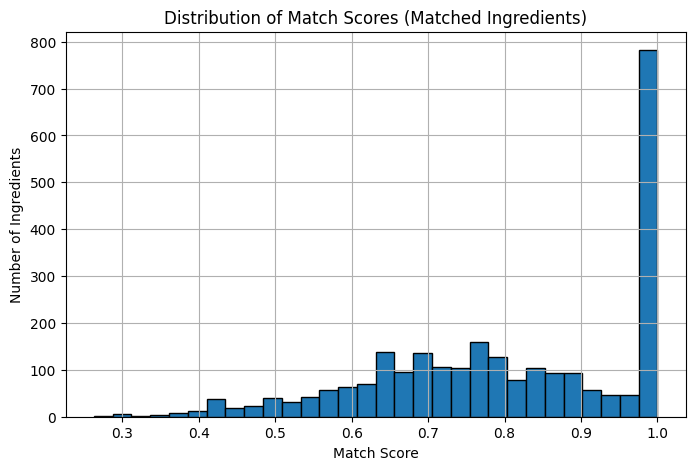


Match score summary:
count    2577.000000
mean        0.805613
std         0.171853
min         0.262564
25%         0.679250
50%         0.804631
75%         1.000000
max         1.000001
Name: match_score, dtype: float64

Top categories by ingredient count:
category
For the Pantry                 691
Fresh Fruits & Veggies         439
Snacks & Sweets                300
Dips, Sauces & Dressings       273
From the Freezer               233
Cheese                         181
Meat, Seafood & Plant-Based    139
Fresh Prepared Foods           110
Dairy & Eggs                   107
Bakery                         104
Name: count, dtype: int64

Average match score per category (matched only):
category
Cheese                         0.874650
Meat, Seafood & Plant-Based    0.839082
For the Pantry                 0.831153
Fresh Fruits & Veggies         0.826385
Bakery                         0.812510
Dips, Sauces & Dressings       0.786092
Dairy & Eggs                   0.780436
Snacks & Sweets

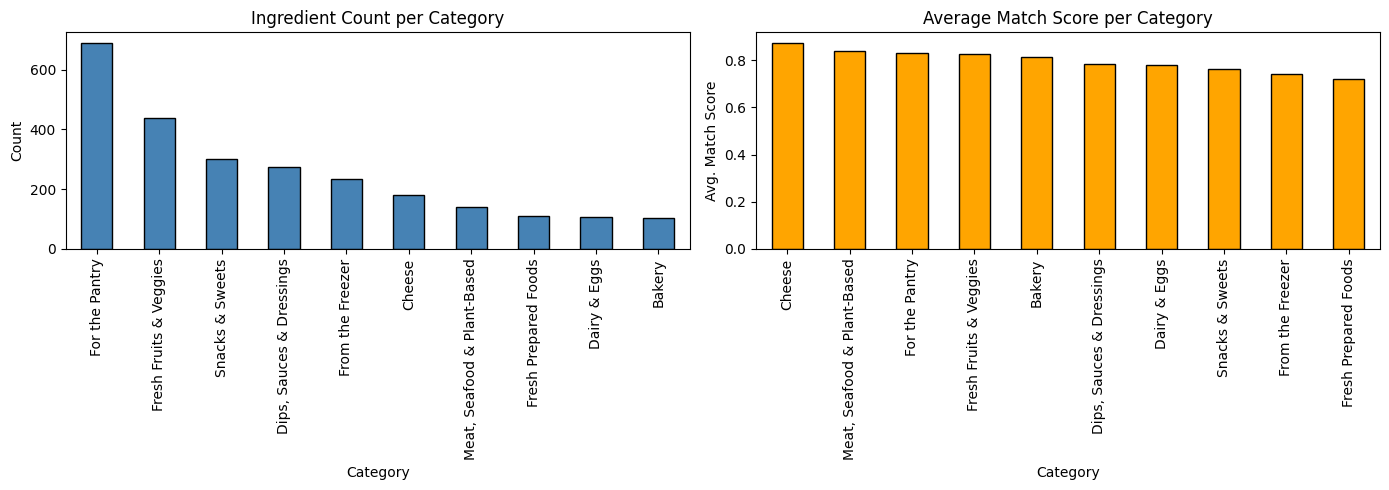

In [37]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
path_new = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\ing_mapped_to_prod.csv"
df_new = pd.read_csv(path_new)

print("Shape:", df_new.shape)
print("Columns:", df_new.columns.tolist())
print(df_new.head())

# --- 1️⃣ Basic overview ---
print("\nBasic info:")
print(df_new.info())
print("\nMissing values per column:")
print(df_new.isna().sum())

# --- 2️⃣ Matched vs unmatched ingredients ---
df_matched = df_new[df_new['matched_product'].notna() & (df_new['matched_product'].astype(str).str.strip() != '')]
df_unmatched = df_new[df_new['matched_product'].isna() | (df_new['matched_product'].astype(str).str.strip() == '')]

print(f"\nMatched ingredients: {len(df_matched)} ({len(df_matched)/len(df_new)*100:.1f}%)")
print(f"Unmatched ingredients: {len(df_unmatched)} ({len(df_unmatched)/len(df_new)*100:.1f}%)")

# --- 3️⃣ Match score distribution ---
plt.figure(figsize=(8,5))
df_matched['match_score'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Match Scores (Matched Ingredients)")
plt.xlabel("Match Score")
plt.ylabel("Number of Ingredients")
plt.show()

print("\nMatch score summary:")
print(df_matched['match_score'].describe())

# --- 4️⃣ Category-level analysis ---
category_counts = df_new['category'].value_counts().sort_values(ascending=False)
category_avg_score = (
    df_matched.groupby('category')['match_score']
    .mean()
    .sort_values(ascending=False)
)

print("\nTop categories by ingredient count:")
print(category_counts.head(10))
print("\nAverage match score per category (matched only):")
print(category_avg_score.head(10))






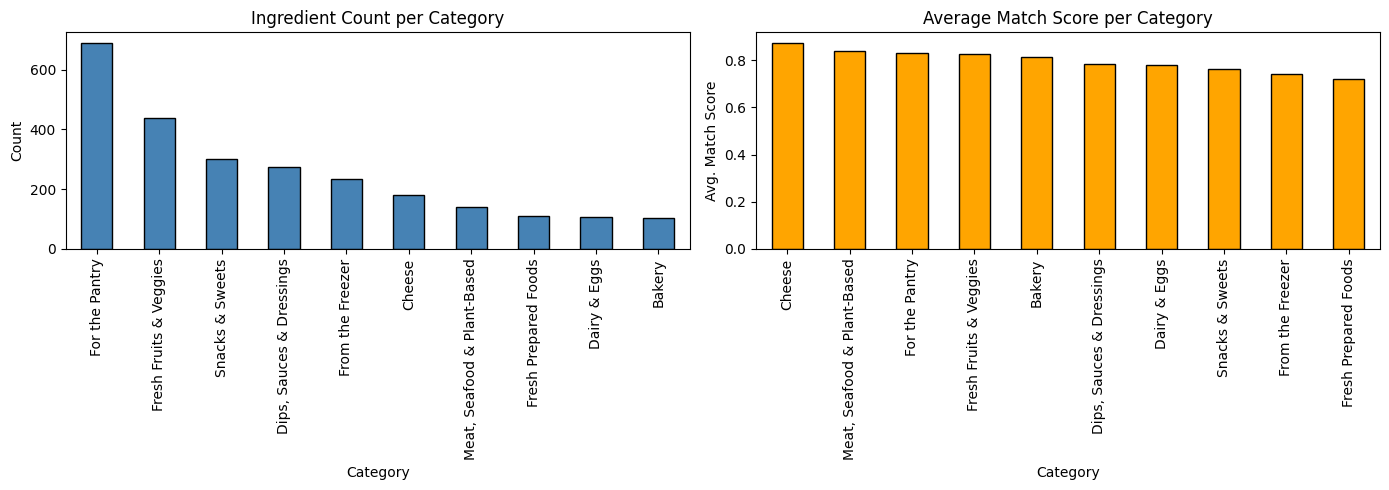

In [38]:
# --- Plot both side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))
category_counts.head(15).plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title("Ingredient Count per Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

category_avg_score.head(15).plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title("Average Match Score per Category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Avg. Match Score")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Top 10 most common matched products (to exclude):
['Extra Virgin Olive Oil, Liter', 'butter', 'cilantro', 'Unbleached Enriched All-Purpose Flour', 'Organic Strawberries 1 Lb', 'lemon', 'garlic', 'Green Onions', 'Organic Avocados 4 count', 'sea salt']


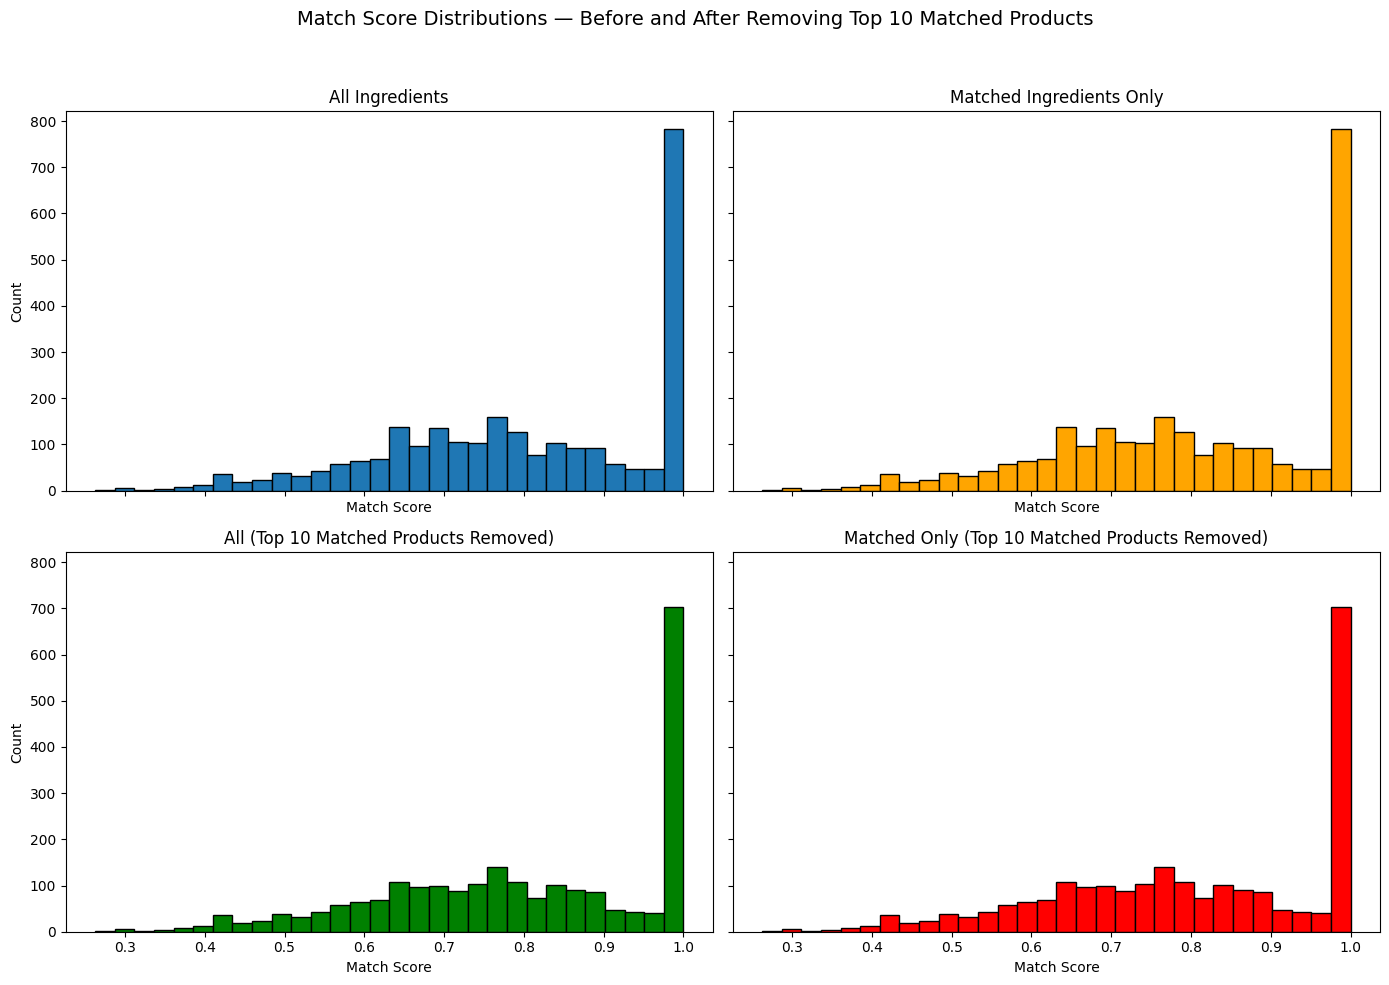


Category summary (after removing top 10 matched products):
                             ingredient_count  avg_match_score
category                                                      
Cheese                                    181         0.874650
Meat, Seafood & Plant-Based               139         0.839082
Dairy & Eggs                               71         0.825408
For the Pantry                            595         0.821557
Bakery                                    104         0.812510
Fresh Fruits & Veggies                    382         0.806562
Dips, Sauces & Dressings                  244         0.804083
Snacks & Sweets                           280         0.761323
From the Freezer                          233         0.741683
Fresh Prepared Foods                      110         0.722159


In [36]:
# --- 5️⃣ Filter out top 10 most common matched products ---
top_matched = df_matched['matched_product'].value_counts().head(10).index
print("\nTop 10 most common matched products (to exclude):")
print(top_matched.tolist())

df_no_top = df_matched[~df_matched['matched_product'].isin(top_matched)]

# --- 6️⃣ 2x2 visualization comparing distributions ---
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharex=True, sharey=True)



# 1️⃣ All ingredients
axes[0,0].hist(df_new['match_score'].dropna(), bins=30, edgecolor='black')
axes[0,0].set_title("All Ingredients")
axes[0,0].set_xlabel("Match Score")
axes[0,0].set_ylabel("Count")

# 2️⃣ Matched-only
axes[0,1].hist(df_matched['match_score'], bins=30, edgecolor='black', color='orange')
axes[0,1].set_title("Matched Ingredients Only")
axes[0,1].set_xlabel("Match Score")

# 3️⃣ All (top 10 matched products removed)
axes[1,0].hist(df_no_top['match_score'], bins=30, edgecolor='black', color='green')
axes[1,0].set_title("All (Top 10 Matched Products Removed)")
axes[1,0].set_xlabel("Match Score")
axes[1,0].set_ylabel("Count")

# 4️⃣ Matched (top 10 removed)
axes[1,1].hist(df_no_top['match_score'], bins=30, edgecolor='black', color='red')
axes[1,1].set_title("Matched Only (Top 10 Matched Products Removed)")
axes[1,1].set_xlabel("Match Score")

plt.suptitle("Match Score Distributions — Before and After Removing Top 10 Matched Products", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 7️⃣ Category overlap-style summary ---
# Average match score + count per category after top 10 removal
cat_summary_filtered = (
    df_no_top.groupby('category')
    .agg(
        ingredient_count=('ingredient_name', 'count'),
        avg_match_score=('match_score', 'mean')
    )
    .sort_values('avg_match_score', ascending=False)
)

print("\nCategory summary (after removing top 10 matched products):")
print(cat_summary_filtered.head(15))